Copyright (c) Microsoft Corporation. All rights reserved.

Licensed under the MIT License.

In [12]:
!pip install mlflow azureml-mlflow python-dotenv

In [13]:
# Import required libraries
from azure.ai.ml import MLClient
from azure.ai.ml.entities import Workspace
from azure.identity import DefaultAzureCredential
import mlflow

In [14]:
# load enter details of your AML workspace from .env file
from dotenv import load_dotenv
import os

load_dotenv()

# get a handle to the workspace
ml_client = MLClient(
    DefaultAzureCredential(), 
    os.environ.get("subscription_id"),
    os.environ.get("resource_group"),
    os.environ.get("workspace")
)

In [15]:
exp_name = 'hello-world-example'
mlflow_tracking_uri = ml_client.workspaces.get(ml_client.workspace_name).mlflow_tracking_uri
mlflow.set_tracking_uri(mlflow_tracking_uri)
mlflow.set_experiment(exp_name)

<Experiment: artifact_location='', creation_time=1690460464274, experiment_id='b0bcb607-3099-445c-8edb-b3d5bfcebfd1', last_update_time=None, lifecycle_stage='active', name='hello-world-example', tags={}>

In [16]:
mlflow.start_run()

# do something
mlflow.log_metric("m1", 2.0)
mlflow.log_metric("m2", 3.0)

mlflow.end_run()

# althernatively, you can use the mlflow client to start and end runs
# with mlflow.start_run():
#     mlflow.log_metric("m1", 2.0)
#     mlflow.log_metric("m2", 3.0)


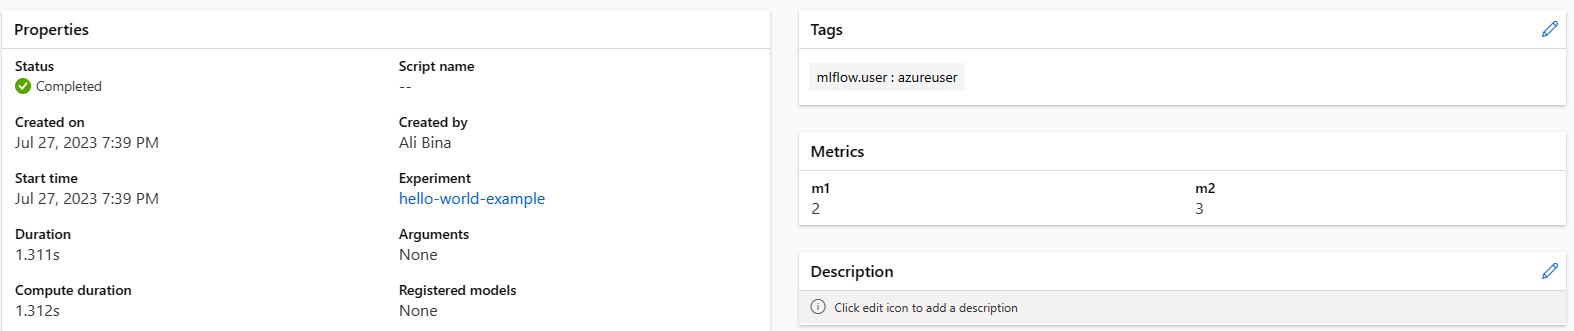

# working with data assets

In [21]:
dataset_name = "iris_datas"
dataset_version = "1"
path = "./data/iris.csv"

In [24]:
# create a sample dataset with 100 rows
import pandas as pd
from sklearn.datasets import load_iris

# load the iris dataset
iris = load_iris()

# create a DataFrame with the iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# write the DataFrame to a CSV file
df.to_csv(path, index=False)

## uploading data to datastore and registering as dataset



In [23]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes
my_data = Data(
    path=path,
    type=AssetTypes.URI_FILE,
    description="iris Data",
    name=dataset_name,
    version=dataset_version
)
ml_client.data.create_or_update(my_data)
registered_data_asset = ml_client.data.get(name=dataset_name, version=dataset_version)
print("Created data asset")

Uploading iris.csv (< 1 MB): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2.47k/2.47k [00:00<00:00, 146kB/s]


Created data asset


In [ ]:
print(f"Registering data {registered_data_asset.name} \n with version {registered_data_asset.version}, \n data path {registered_data_asset.path}")

Registering data iris_dataset 
 with version 1, 
 data path azureml://subscriptions/f804f2da-c27b-45ac-bf80-16d4d331776d/resourcegroups/rg-mlopsv2clas-505prod/workspaces/mlw-mlopsv2clas-505prod/datastores/workspaceblobstore/paths/LocalUpload/e8a112e751cd59ab20fbdc494bd78594/iris.csv
